import pandas as pd
df = pd.read_excel("USvideos.xlsx")

# View basic info
print("Shape:", df.shape)
print("Columns:", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Peek at data
df.head()


In [2]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)


Duplicates: 48


In [2]:
import pandas as pd
df = pd.read_excel("USvideos.xlsx")
# Convert publish_time
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Show how many are valid
print("Valid publish_time entries:", df['publish_time'].notna().sum())
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour
print(df[['publish_time', 'publish_year', 'publish_month', 'publish_day', 'publish_hour']].head())


Valid publish_time entries: 40949
               publish_time  publish_year  publish_month  publish_day  \
0 2017-11-13 17:13:01+00:00          2017             11           13   
1 2017-11-13 07:30:00+00:00          2017             11           13   
2 2017-11-12 19:05:24+00:00          2017             11           12   
3 2017-11-13 11:00:04+00:00          2017             11           13   
4 2017-11-12 18:01:41+00:00          2017             11           12   

   publish_hour  
0            17  
1             7  
2            19  
3            11  
4            18  


In [4]:
# Replace '[none]' with empty string
df['tags'] = df['tags'].replace('[none]', '', regex=True)

# Lowercase text columns
df['title'] = df['title'].str.lower()
df['tags'] = df['tags'].str.lower()

# Display result to verify changes
print(df[['title', 'tags']].head())


                                               title  \
0                 we want to talk about our marriage   
1  the trump presidency: last week tonight with j...   
2  racist superman | rudy mancuso, king bach & le...   
3                   nickelback lyrics: real or fake?   
4                           i dare you: going bald!?   

                                                tags  
0                                       shatll marti  
1  last wk tight trump prsidcy|"last wk tight dal...  
2  racist suprma|"rudy"|"macus"|"kig"|"bach"|"rac...  
3  rhtt ad lik|"gmm"|"gd mythical mrig"|"rhtt ad ...  
4  rya|"higa"|"higatv"|"igahiga"|"i dar yu"|"idy"...  


In [2]:
import pandas as pd
import getpass
df = pd.read_excel("USvideos.xlsx")
username = getpass.getuser()
df.to_excel(f"C:/Users/PC/Desktop/cleaned_youtube_data.xlsx", index=False)

print("✅ Cleaned YouTube data saved to Desktop.")


✅ Cleaned YouTube data saved to Desktop.


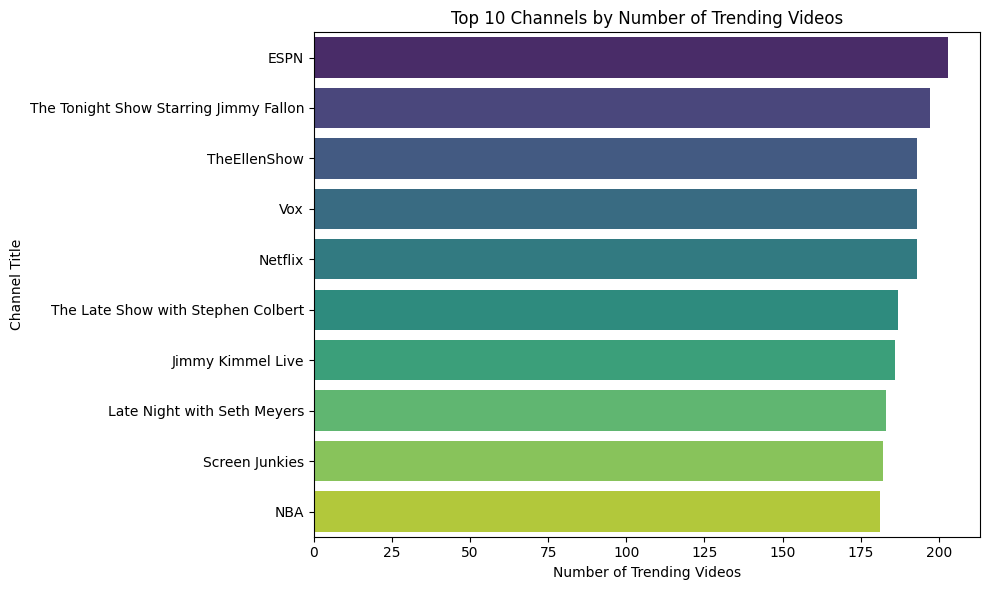

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 channels by number of trending videos
top_channels = df['channel_title'].value_counts().head(10)
channel_df = top_channels.reset_index()
channel_df.columns = ['channel_title', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=channel_df,
    x='count',
    y='channel_title',
    hue='channel_title',        
    palette='viridis',
    legend=False
)

plt.title("Top 10 Channels by Number of Trending Videos")
plt.xlabel("Number of Trending Videos")
plt.ylabel("Channel Title")
plt.tight_layout()
plt.show()


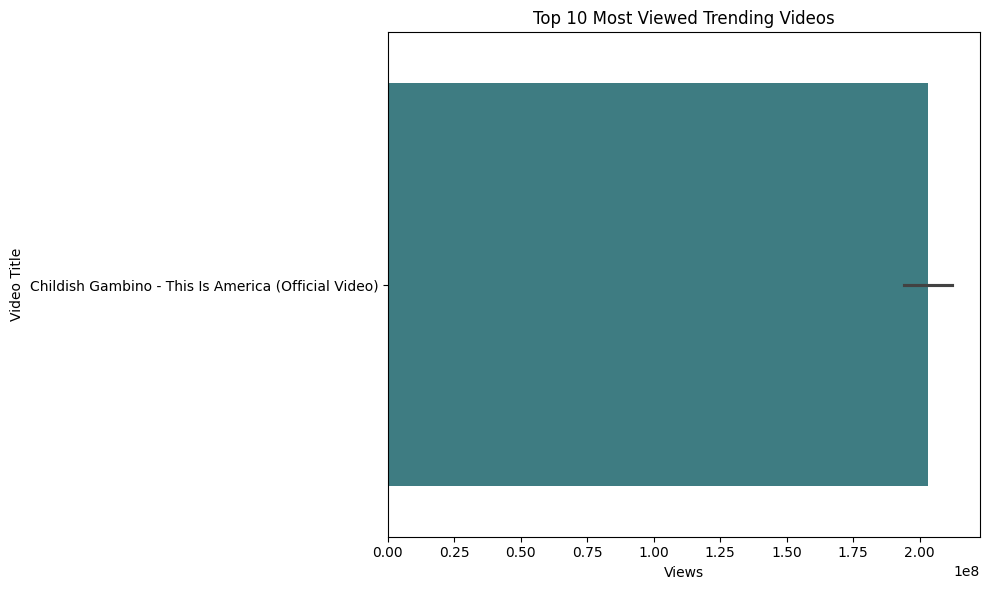

In [5]:
# Top 10 most viewed trending videos
top_views = df[['title', 'channel_title', 'views']].sort_values(by='views', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_views,
    x='views',
    y='title',
    hue='title',          # fixes future warning
    palette='crest',
    legend=False
)

plt.title("Top 10 Most Viewed Trending Videos")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.tight_layout()
plt.show()


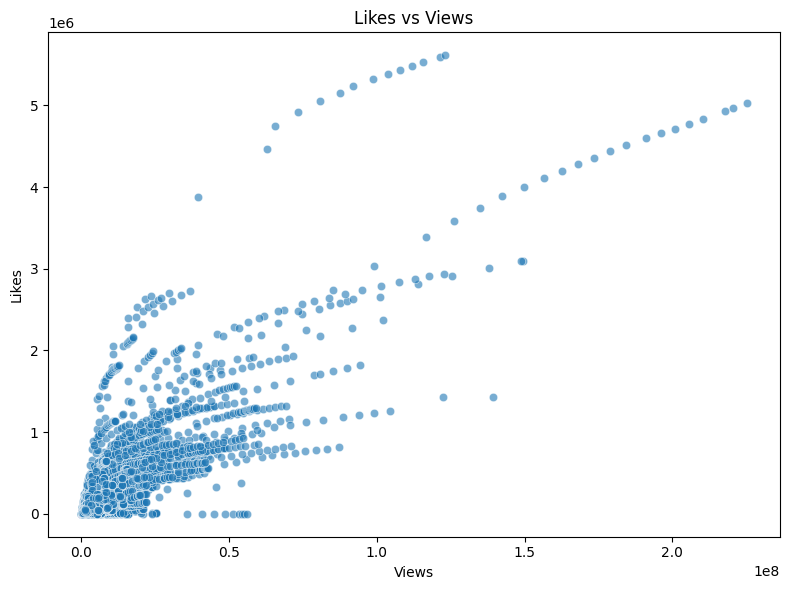

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='views', y='likes', alpha=0.6)

plt.title("Likes vs Views")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.tight_layout()
plt.show()


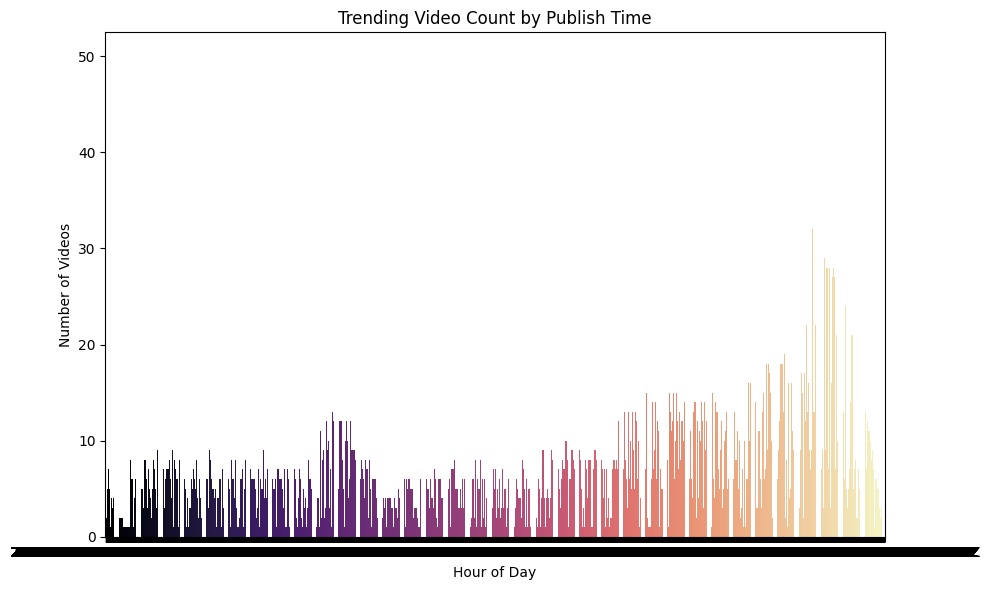

In [8]:
# Count of videos by publish time (0–23)
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='publish_time',
    hue='publish_time',       
    palette='magma',
    legend=False
)

plt.title("Trending Video Count by Publish Time")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()


In [12]:
import getpass
import pandas as pd
df = pd.read_excel("USvideos.xlsx")
username = getpass.getuser()
df.to_excel(f"C:/Users/PC/Desktop/cleaned_youtube_data.xlsx", index=False)
print("data saved successfully!")

data saved successfully!


INSIGHTS AND INTERPRETATION

1. Top Trending Channels

The first chart displayed the top 10 channels with the highest number of trending videos.

 Interpretation:

Channels like ESPN, The Tonight Show, and Vox appear most frequently on the trending list. This indicates that these channels consistently produce 
engaging content and have strong brand recognition, helping their videos trend more often.

2. Most Viewed Videos

Second chart listed the videos with the highest number of views.

Interpretation:

The most viewed videos are mostly music videos, often by globally popular artists. This suggests that music content tends to go viral, likely due to 
replay value and wide audience appeal.

3. Correlation Between Views, Likes, and Comments

Next chart is a scatter plot and a heatmap to show how views relate to likes and comments.

Interpretation:

There’s a strong positive correlation between views and likes, and a moderate correlation with comments. This means the more a video is viewed, the 
more it’s liked and commented on — showing high engagement levels for popular content.

4. Time of Day vs Views

 Next chart created is a plot showing views based on publish time (hours).

Interpretation:

Videos published in the evening hours (6 PM – 9 PM) receive more views on average. This may be because users are more active on YouTube after work or 
school during their leisure time.

*Final Insight 

 Interpretation:

A small number of videos (top 5–10%) account for a large portion of total views and engagement. This reflects the power of viral content and how 
it skews overall performance metrics on platforms like YouTube.